In [76]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 20)
df = pd.read_csv("Health Screening Data.csv")
df

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,BMI,BMICat,AgeGroup,bp_status,cholesterol_status,glucose_status
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50,22.0,Normal,40-60,高血壓,正常,正常
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.9,Obese,40-60,高血壓,偏高,正常
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.5,Normal,40-60,高血壓,偏高,正常
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.7,Over Weight,40-60,高血壓,正常,正常
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.0,Normal,40-60,正常,正常,正常
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69955,99993,2,168,76.0,120,80,1,1,1,0,1,0,52,26.9,Over Weight,40-60,高血壓,正常,正常
69956,99995,1,158,126.0,140,90,2,2,0,0,1,1,61,50.5,Obese,>60,高血壓,偏高,高血糖
69957,99996,2,183,105.0,180,90,3,1,0,1,0,1,52,31.4,Obese,40-60,高血壓,偏高,正常
69958,99998,1,163,72.0,135,80,1,2,0,0,0,1,61,27.1,Over Weight,>60,高血壓,正常,高血糖


In [77]:
df2 = df.copy()



def classify_bp(row):
    ap_hi = row['ap_hi']
    ap_lo = row['ap_lo']
    
    if ap_hi < 90 or ap_lo < 60:
        return '低血壓'
    elif ap_hi < 120 and ap_lo < 80:
        return '正常'
    elif (120 <= ap_hi <= 139 or 80 <= ap_lo <= 89) or (ap_hi >= 140 or ap_lo >= 90):
        return '高血壓'
    else:
        return '未知'

def cholesterol_status(row):
    cholesterol = row['cholesterol']

    if cholesterol == 1:
        return '正常'
    elif cholesterol in [2, 3]:
        return '偏高'
    else:
        return '未知'

def glucose_status(row):
    gluc = row['gluc']

    if gluc == 1:
        return '正常'
    elif gluc in [2, 3]:
        return '高血糖'
    else:
        return '未知'
    
df2['bp_status'] = df2.apply(classify_bp, axis=1)
df2['cholesterol_status'] = df2.apply(cholesterol_status, axis=1)
df2['glucose_status'] = df2.apply(glucose_status, axis=1)
df2


,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,BMI,BMICat,AgeGroup,bp_status,cholesterol_status,glucose_status
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50,22.0,Normal,40-60,高血壓,正常,正常
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.9,Obese,40-60,高血壓,偏高,正常
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.5,Normal,40-60,高血壓,偏高,正常
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.7,Over Weight,40-60,高血壓,正常,正常
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.0,Normal,40-60,正常,正常,正常
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69955,99993,2,168,76.0,120,80,1,1,1,0,1,0,52,26.9,Over Weight,40-60,高血壓,正常,正常
69956,99995,1,158,126.0,140,90,2,2,0,0,1,1,61,50.5,Obese,>60,高血壓,偏高,高血糖
69957,99996,2,183,105.0,180,90,3,1,0,1,0,1,52,31.4,Obese,40-60,高血壓,偏高,正常
69958,99998,1,163,72.0,135,80,1,2,0,0,0,1,61,27.1,Over Weight,>60,高血壓,正常,高血糖


In [78]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency


# 計算所有數值型變量與 'cardio' 的相關係數
correlations = df3.corr()['cardio'].drop('cardio')  # 移除 'cardio' 與自己的相關性
print("Pearson correlation coefficients:\n", correlations)

# 對於類別型變量，進行卡方檢驗
categorical_features = ['gender', 'smoke', 'alco', 'active']
print("\nChi-squared tests results:")
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['cardio'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"{feature}: Chi2 = {chi2}, p-value = {p_value}")


Pearson correlation coefficients:
 id                       0.003812
gender                   0.008099
height                  -0.010913
weight                   0.181642
ap_hi                    0.401966
                           ...   
bp_status_高血壓            0.218133
cholesterol_status_偏高    0.205517
cholesterol_status_正常   -0.205517
glucose_status_正常       -0.090821
glucose_status_高血糖       0.090821
Name: cardio, Length: 27, dtype: float64

Chi-squared tests results:
gender: Chi2 = 4.554928579915648, p-value = 0.032824132778452114
smoke: Chi2 = 16.582718033124237, p-value = 4.657349147216091e-05
alco: Chi2 = 3.6639310280208326, p-value = 0.05560230015387286
active: Chi2 = 88.82713012960583, p-value = 4.308661020252574e-21


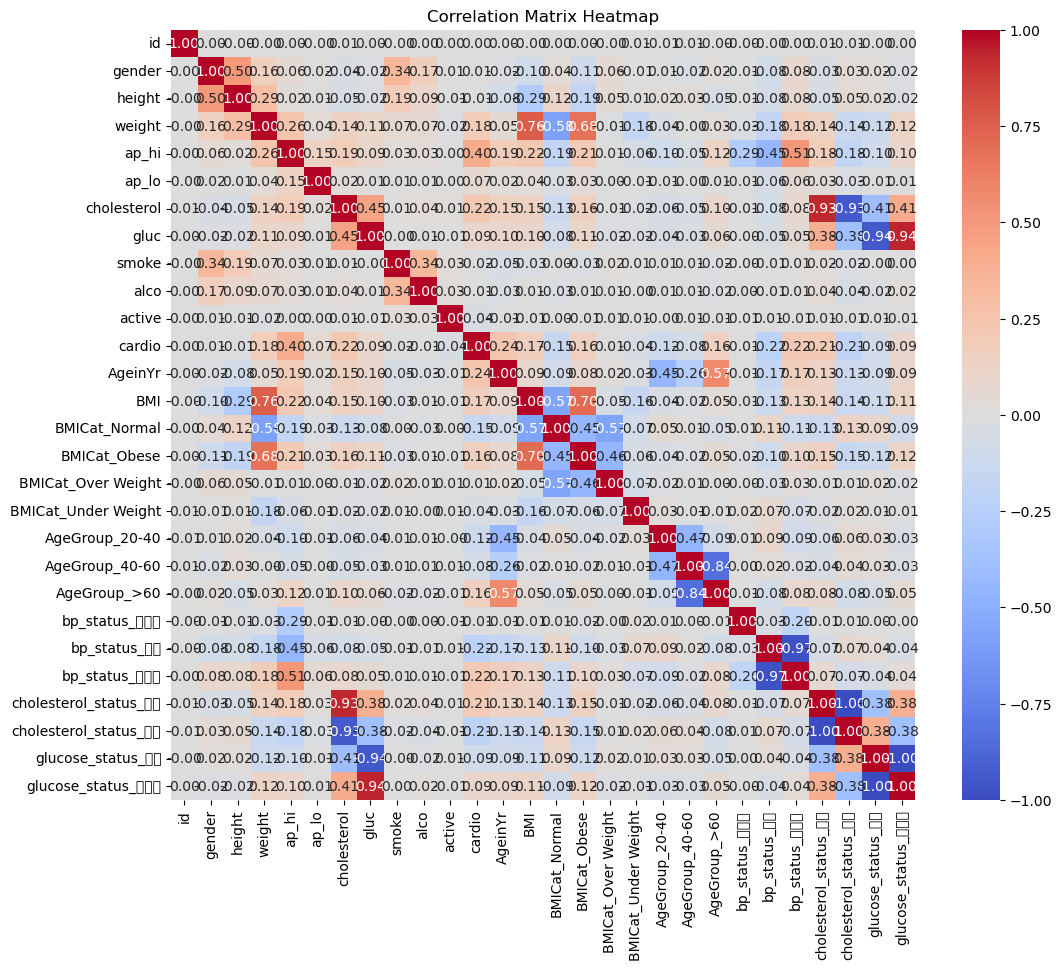

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 计算相关矩阵
correlation_matrix = df3.corr()

# 使用 seaborn 生成热力图
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


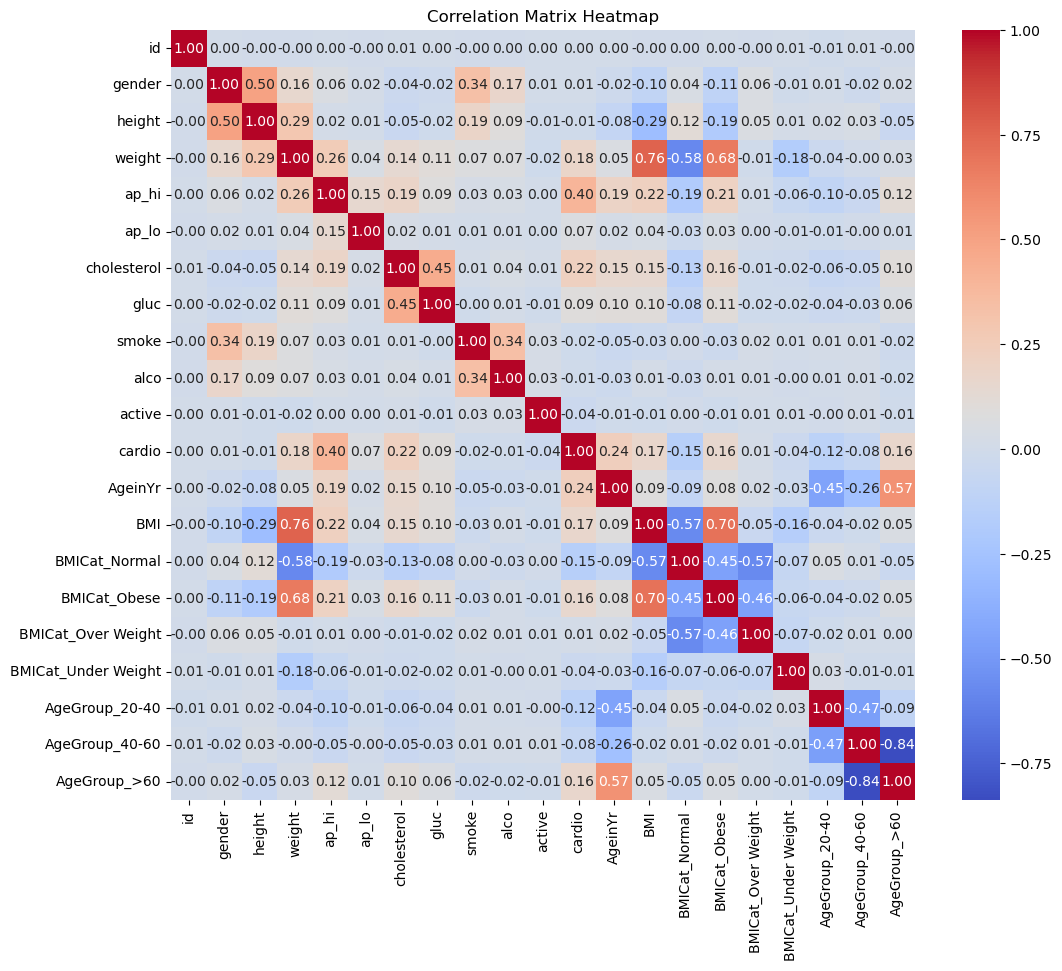

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假設你的數據框名為df3
# df3 = pd.read_csv('your_data.csv')  # 如果你的數據是從CSV文件讀取的
df3 = pd.get_dummies(df2, columns=['BMICat', 'AgeGroup','bp_status', 'cholesterol_status', 'glucose_status'])

# 排除不需要的欄位
columns_to_exclude = ['bp_status_低血壓', 'bp_status_正常', 'bp_status_高血壓', 'cholesterol_status_偏高', 'cholesterol_status_正常', 'glucose_status_正常', 'glucose_status_高血糖']
df_filtered = df3.drop(columns=columns_to_exclude)

# 計算相關矩陣
correlation_matrix = df_filtered.corr()

# 使用 seaborn 生成熱力圖
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


Logistic Regression: Accuracy = 0.73
Confusion Matrix for Logistic Regression:
[[5479 1610]
 [2200 4703]]

K-Nearest Neighbors: Accuracy = 0.69
Confusion Matrix for K-Nearest Neighbors:
[[4968 2121]
 [2198 4705]]

Decision Tree: Accuracy = 0.73
Confusion Matrix for Decision Tree:
[[5546 1543]
 [2172 4731]]

Random Forest: Accuracy = 0.72
Confusion Matrix for Random Forest:
[[5218 1871]
 [2042 4861]]

Gradient Boosting: Accuracy = 0.73
Confusion Matrix for Gradient Boosting:
[[5423 1666]
 [2045 4858]]

XGBoost: Accuracy = 0.73
Confusion Matrix for XGBoost:
[[5388 1701]
 [2052 4851]]

Naive Bayes: Accuracy = 0.68
Confusion Matrix for Naive Bayes:
[[4821 2268]
 [2203 4700]]



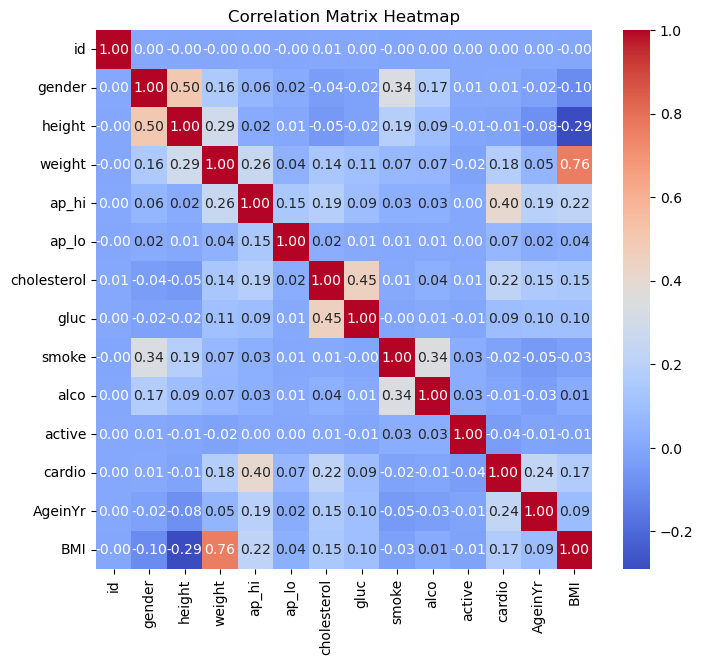

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# 假設你的數據框名為df2，首先對 'BMICat' 和 'AgeGroup' 進行獨熱編碼
df3 = pd.get_dummies(df2, columns=['BMICat', 'AgeGroup', 'bp_status', 'cholesterol_status', 'glucose_status'])

# 分割數據集為訓練集和測試集
X = df3.drop('cardio', axis=1)  # 特徵
y = df3['cardio']  # 目標變數
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 標準化特徵
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 初始化模型
models = {
    "Logistic Regression": LogisticRegression(max_iter=100),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Naive Bayes": GaussianNB()
}

# 訓練和評估模型
results = {}
conf_matrices = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # 注意使用標準化的數據
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    conf_mat = confusion_matrix(y_test, predictions)
    results[name] = accuracy
    conf_matrices[name] = conf_mat

# 打印結果
for name, accuracy in results.items():
    print(f"{name}: Accuracy = {accuracy:.2f}")
    print(f"Confusion Matrix for {name}:\n{conf_matrices[name]}\n")

# 計算相關矩陣
# 排除不需要的欄位
columns_to_exclude = ['bp_status_低血壓', 'bp_status_正常', 'bp_status_高血壓', 'cholesterol_status_偏高', 'cholesterol_status_正常', 'glucose_status_正常', 'glucose_status_高血糖']
df_filtered = df3.drop(columns=columns_to_exclude)

# 只保留數值型欄位
numeric_df_filtered = df_filtered.select_dtypes(include=['float64', 'int64'])

# 計算相關矩陣
correlation_matrix = numeric_df_filtered.corr()

# 使用 seaborn 生成熱力圖
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


Logistic Regression: Accuracy = 0.73
Confusion Matrix for Logistic Regression:
[[5482 1607]
 [2223 4680]]

K-Nearest Neighbors: Accuracy = 0.70
Confusion Matrix for K-Nearest Neighbors:
[[5006 2083]
 [2139 4764]]

Decision Tree: Accuracy = 0.73
Confusion Matrix for Decision Tree:
[[5546 1543]
 [2172 4731]]

Random Forest: Accuracy = 0.71
Confusion Matrix for Random Forest:
[[5084 2005]
 [2015 4888]]

Gradient Boosting: Accuracy = 0.74
Confusion Matrix for Gradient Boosting:
[[5417 1672]
 [2016 4887]]

XGBoost: Accuracy = 0.73
Confusion Matrix for XGBoost:
[[5392 1697]
 [2071 4832]]

Naive Bayes: Accuracy = 0.68
Confusion Matrix for Naive Bayes:
[[4874 2215]
 [2207 4696]]



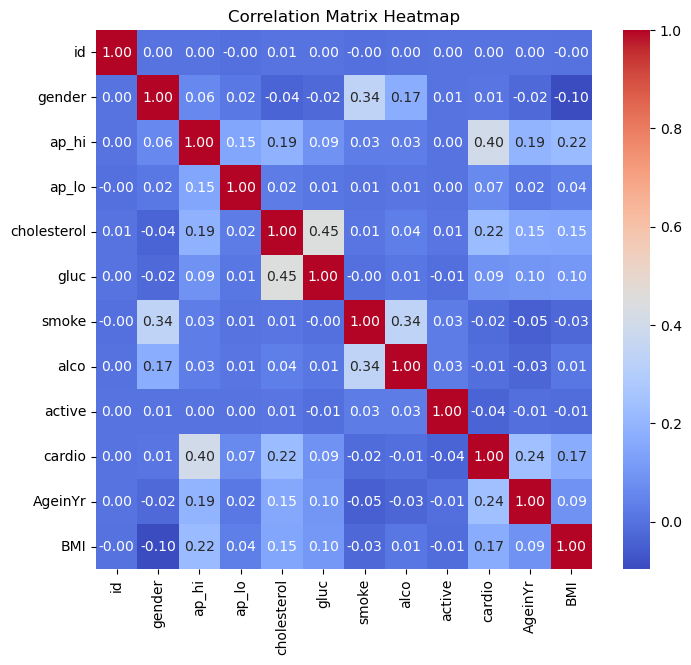

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# 假設你的數據框名為df2，首先對 'BMICat' 和 'AgeGroup' 進行獨熱編碼
df3 = pd.get_dummies(df2, columns=['BMICat', 'AgeGroup', 'bp_status', 'cholesterol_status', 'glucose_status'])

# 刪除 'weight' 和 'height' 欄位
df3 = df3.drop(columns=['weight', 'height'])

# 分割數據集為訓練集和測試集
X = df3.drop('cardio', axis=1)  # 特徵
y = df3['cardio']  # 目標變數
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 標準化特徵
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 初始化模型
models = {
    "Logistic Regression": LogisticRegression(max_iter=100),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Naive Bayes": GaussianNB()
}

# 訓練和評估模型
results = {}
conf_matrices = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # 注意使用標準化的數據
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    conf_mat = confusion_matrix(y_test, predictions)
    results[name] = accuracy
    conf_matrices[name] = conf_mat

# 打印結果
for name, accuracy in results.items():
    print(f"{name}: Accuracy = {accuracy:.2f}")
    print(f"Confusion Matrix for {name}:\n{conf_matrices[name]}\n")

# 排除不需要的欄位
columns_to_exclude = ['bp_status_低血壓', 'bp_status_正常', 'bp_status_高血壓', 'cholesterol_status_偏高', 'cholesterol_status_正常', 'glucose_status_正常', 'glucose_status_高血糖']
df_filtered = df3.drop(columns=columns_to_exclude)

# 只保留數值型欄位
numeric_df_filtered = df_filtered.select_dtypes(include=['float64', 'int64'])

# 計算相關矩陣
correlation_matrix = numeric_df_filtered.corr()

# 使用 seaborn 生成熱力圖
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()
